<h1>Start of Iris Flower Dataset Classification Project</h1>

***Objective: Classify the dataset using Decision Trees, K-Nearest Neighbour and SVM*** <br>
***Step 1:*** Loading the dataset.<br>
***Step 2:*** EDA. <br>
***Step 3:*** Data preprocession. <br>
***Step 4:*** Training classification models and evaluating performance. <br>
***Step 5:*** Final summary and insights.

<h1>Step 1</h1>

In [1]:
import pandas as pd


iris_df = pd.read_csv("Datasets/IRIS.csv")

iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,Iris-versicolor
45,4.8,3.0,1.4,0.3,Iris-setosa
130,7.4,2.8,6.1,1.9,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
46,5.1,3.8,1.6,0.2,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
61,5.9,3.0,4.2,1.5,Iris-versicolor
102,7.1,3.0,5.9,2.1,Iris-virginica
35,5.0,3.2,1.2,0.2,Iris-setosa


Iris dataframe has been successfully loaded.

<h1>Step 2</h1>

In [2]:
print(iris_df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [3]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
print(iris_df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


***Importing Libraries for Plotting***

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

***Sepal Length Histogram***

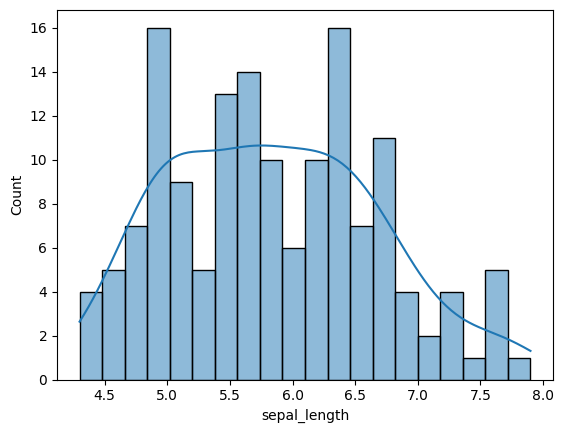

In [6]:
sns.histplot(iris_df['sepal_length'], bins=20, kde=True)

plt.show()

***Sepal Width Boxplot***

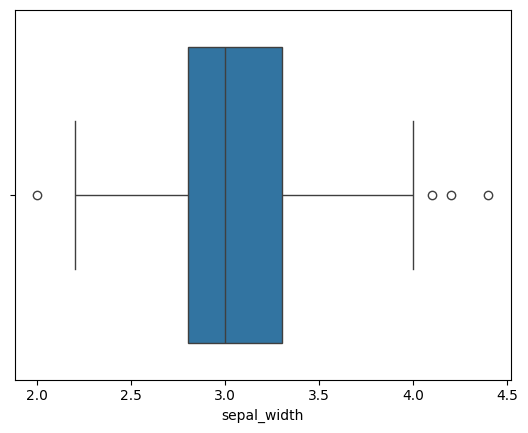

In [7]:
sns.boxplot(x=iris_df['sepal_width'])

plt.show()

***Petal Length Histogram***

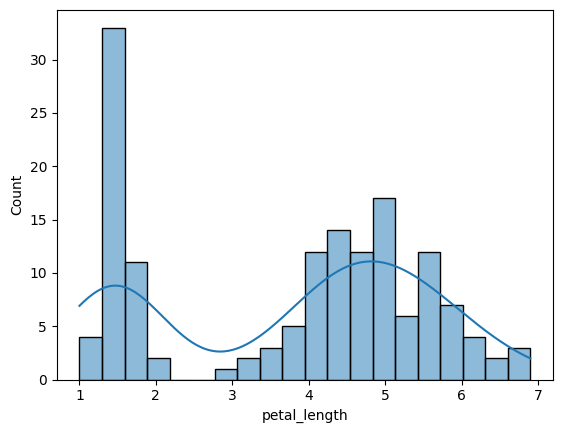

In [8]:
sns.histplot(iris_df['petal_length'], bins=20, kde=True)

plt.show()

***Petal Width Boxplot***

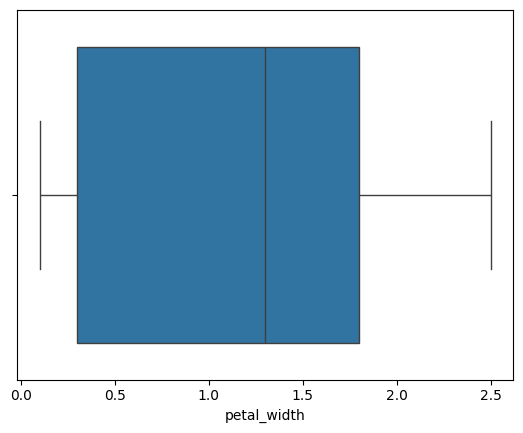

In [9]:
sns.boxplot(x=iris_df['petal_width'])

plt.show()

***Encode Species*** <br>
***3D Charts with petal width, length and sepal length***

{'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


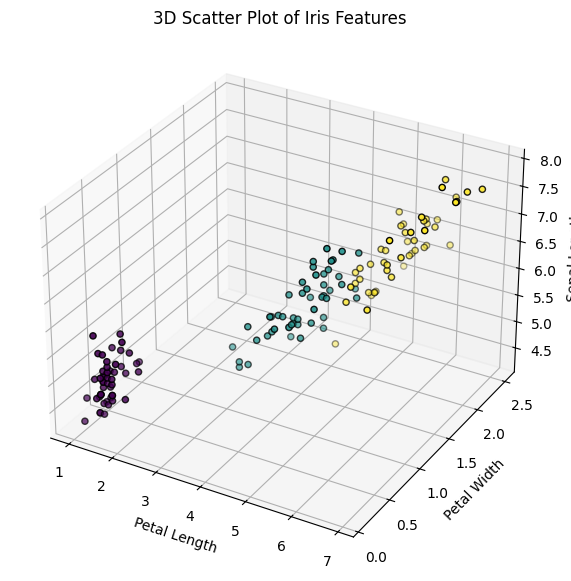

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(iris_df['petal_length'], iris_df['petal_width'], iris_df['sepal_length'],
           c=iris_df['species_encoded'], cmap='viridis', edgecolor='k')

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_zlabel("Sepal Length")
ax.set_title("3D Scatter Plot of Iris Features")

# Show plot
plt.show()

***Analyzing Correlations***

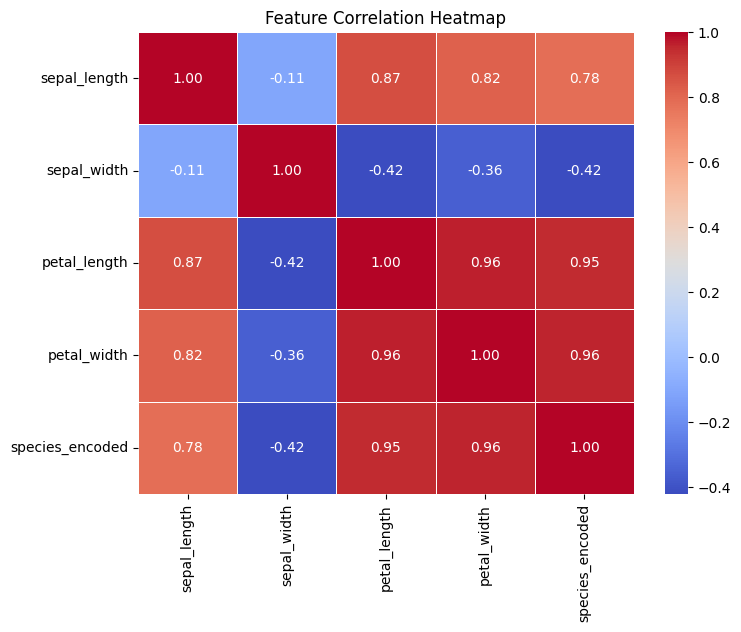

In [11]:
correlation_matrix = iris_df.drop(columns="species").corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")

plt.show()

<h1>Step 3</h1>

***Spliting dataset into training and testing***

In [12]:
from sklearn.model_selection import train_test_split

y=iris_df['species_encoded']
X=iris_df.drop(columns=['species', 'species_encoded'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

***Standardizing Data***

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check first few rows
X_train_scaled.head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.413416,-1.464401,-0.100146,-0.321500
1,0.551222,-0.495821,0.717711,0.353650
2,0.671802,0.230614,0.951384,0.758740
3,0.912961,-0.011531,0.308783,0.218620
4,1.636440,1.441340,1.301894,1.703949


<h1>Step 4</h1>

<h3>Train Decision Tree Model</h3>

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_model.fit(X_train_scaled, y_train)

y_pred = dt_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 1.00


In [30]:
train_acc = dt_model.score(X_train_scaled, y_train)
test_acc = dt_model.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

Training Accuracy: 0.95
Testing Accuracy: 1.00


In [31]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_model, X, y, cv=5)
print(f"Cross-validation Accuracy: {cv_scores.mean():.2f}")

Cross-validation Accuracy: 0.97


***Evaluating Model Performance***

In [32]:
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Confusion Matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



***Visualizing the Tree***

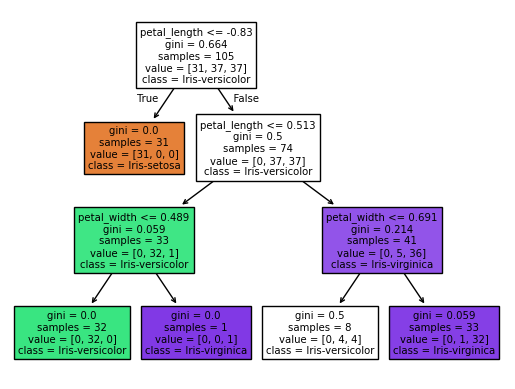

In [33]:
from sklearn.tree import plot_tree

plot_tree(dt_model, feature_names=X_train.columns, class_names=iris_df['species'].unique().tolist(), filled=True)
plt.show()

<h3>K-Nearest Neighbour Model</h3>

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred)
print(f"k-NN Accuracy: {accuracy_knn:.2f}")

k-NN Accuracy: 0.98


***Evaluating Model Performance***

In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



***Optimizing for the number of K(s)***

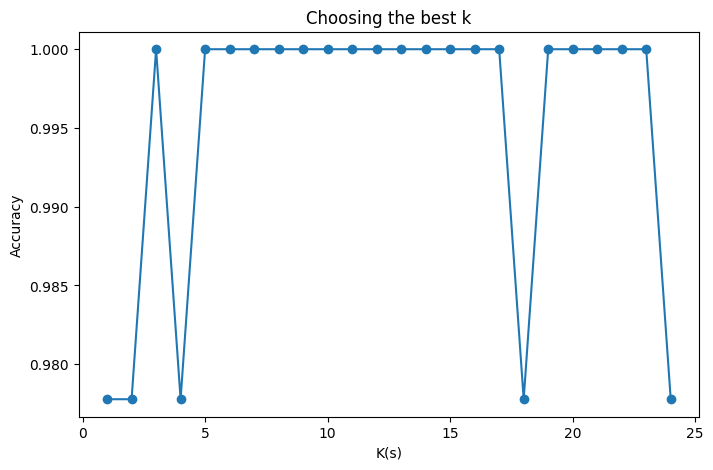

In [21]:
k_values = range(1, 25)
accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)

    knn_model.fit(X_train_scaled, y_train)

    y_pred = knn_model.predict(X_test_scaled)

    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("K(s)")
plt.ylabel("Accuracy")
plt.title("Choosing the best k")
plt.show()

<h3>Training SVM Model</h3>

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.98


***Evaluating Model Performance***

In [23]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



***Trying different kernels***

In [28]:
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    svm_temp = SVC(kernel=kernel, random_state=42)
    svm_temp.fit(X_train_scaled, y_train)
    y_pred_temp = svm_temp.predict(X_test_scaled)
    
    print(f"\nSVM with {kernel} kernel - Accuracy: {accuracy_score(y_test, y_pred_temp):.2f}")



SVM with linear kernel - Accuracy: 0.98

SVM with rbf kernel - Accuracy: 1.00

SVM with poly kernel - Accuracy: 0.96


<h1>Step 5</h1>

***Key takeaways***

**Step 1:** The key takeaways from step 1 are that instead of downloading the file into a folder and reading the csv I could have imported the Iris dataset library and had the data that way as it would've allowed more flexibility with my code later on. <br>
**Step 2:** To detect outliers I could've used the Z-score method to detect data points that have very large standard deviations or used the interquartile range method. I feel I did a good job encoding the species and creating a new column instead of replacing them and having a dictionary for the species and their numbers is a very clear way to know which species is which. <br>
**Step 3:** I created taining and testing data which is pretty standard, however, I could've used validation data to tune the hyperparameters of my models. Scaling the data was well done and it is critical for the K-NN model and SVM. Why? Because the K-NN uses euclidean distances and if the data is not standardized than one feature can dominate all the others. The SVM again uses distances on a hyperplane to make decisions about the species. <br>
**Step 4:** What we can see from the deicision tree is we are likely not overfitting. Why? The samples are still quite high as we only have a max depth of 3. The decision tree also hasn't evaluated on the sepal information at all. Yet we still receive a very good score. When trying to make a decision on which feature to split the model is deciding it based on what will minimize the gini impurity. The gini is calculated as follows (=1 - SUM(p_i^2)) => (p_i = %of_type_1/all_types) => (ex: 35 flowers, 5 versicolor, 30 setosa, p_i_setosa = 30/35 and so on). <br>
<br>
The K-NN we see that adjusting the k-neighbours doesn't change the results too much as the species are so distinct. K-NN might have been the best model to use since we didn't have very much training data due to KNN not needing any training data. However, since the species are so distinct in their traits it performs very similarly to all the other models. <br>
<br>
The SVM hyperplane is only impacted by the closest target variable of each species. We also see that the RBF kernel performs slightly better than the other kernels.

<h1>End of Notebook</h1>